In [ ]:
import os
import shutil
from glob import glob

# Source directory where all images are stored
source_dir = "dataset/portrait-personality-3"
output_dir = "grouped_personality-3"

os.makedirs(output_dir, exist_ok=True)

# Get all jpg files
image_paths = glob(os.path.join(source_dir, "*.jpg"))

for img_path in image_paths:
    filename = os.path.basename(img_path)
    
    # Extract the video ID: everything before '.mp4-'
    if ".mp4-" in filename:
        video_id = filename.split(".mp4-")[0]
    else:
        continue  # Skip if doesn't follow pattern

    # Create a folder for this video ID if not exists
    video_folder = os.path.join(output_dir, video_id)
    os.makedirs(video_folder, exist_ok=True)

    # Destination path
    dest_path = os.path.join(video_folder, filename)
    shutil.copy2(img_path, dest_path)  # use shutil.move if you want to move

print("Images grouped into folders based on video ID.")


In [3]:
import os
import shutil
import random

source_dir = 'prepared_dataset'
output_base = 'split_dataset'
train_ratio, val_ratio, test_ratio = 0.6, 0.2, 0.2

# Ensure reproducibility
random.seed(42)

# Create output folders
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(output_base, split), exist_ok=True)

# Get all class folders
all_classes = [f for f in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, f))]
random.shuffle(all_classes)

# Split folders
n_total = len(all_classes)
n_train = int(n_total * train_ratio)
n_val = int(n_total * val_ratio)

train_classes = all_classes[:n_train]
val_classes = all_classes[n_train:n_train + n_val]
test_classes = all_classes[n_train + n_val:]

# Function to copy folders
def copy_class_folders(class_list, split_name):
    for class_name in class_list:
        src = os.path.join(source_dir, class_name)
        dst = os.path.join(output_base, split_name, class_name)
        shutil.copytree(src, dst)

# Copy each split
copy_class_folders(train_classes, 'train')
copy_class_folders(val_classes, 'val')
copy_class_folders(test_classes, 'test')

print("Split complete!")


Split complete!


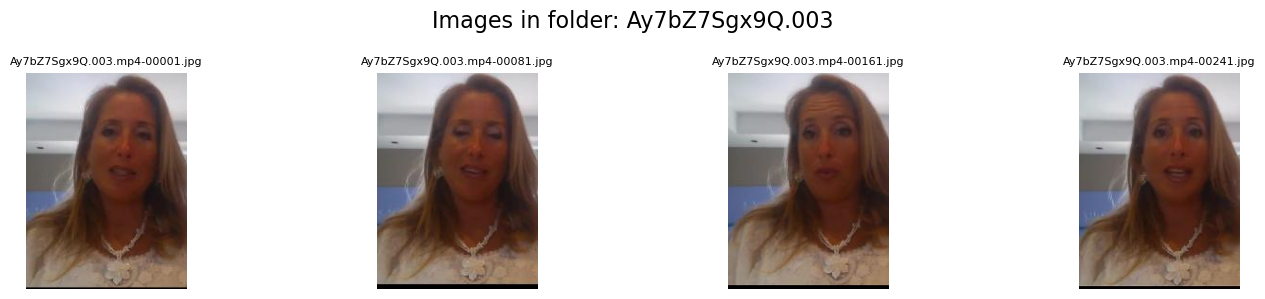

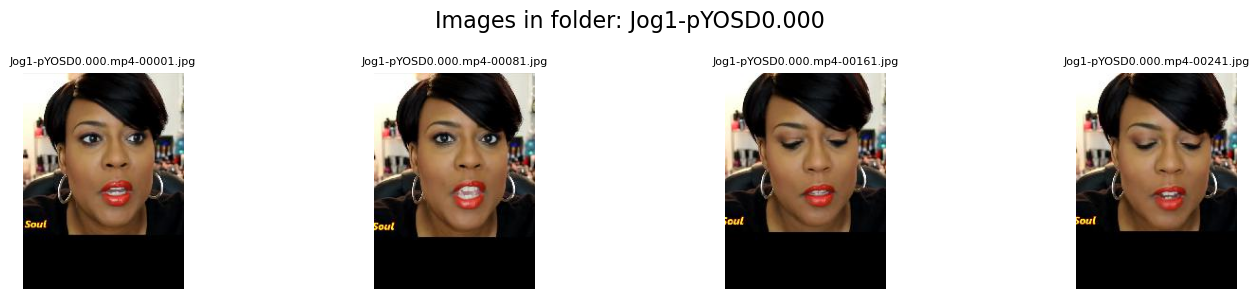

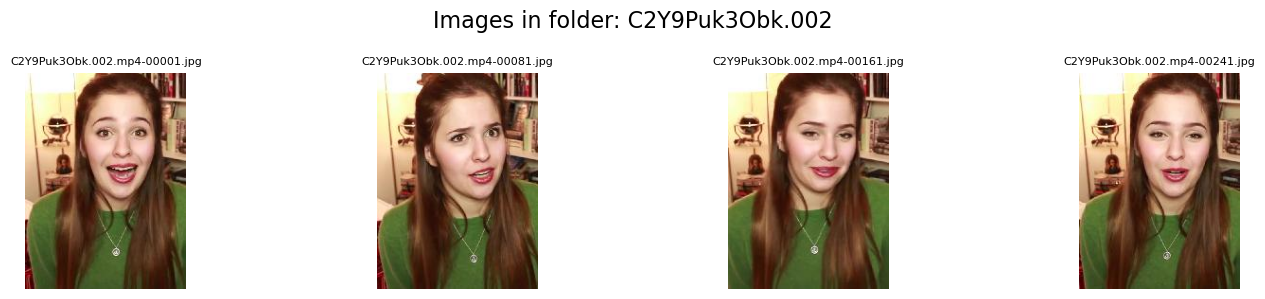

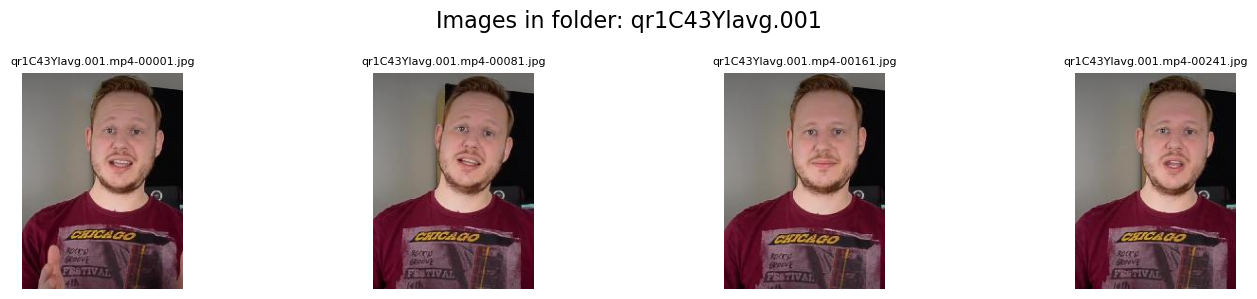

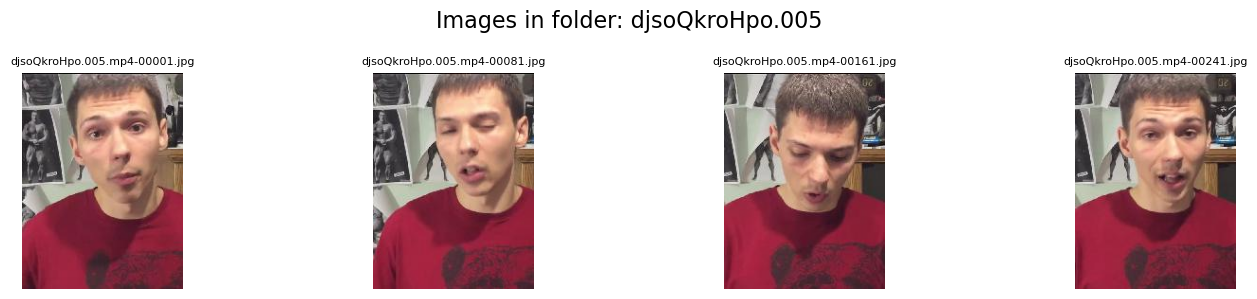

In [4]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your 'prepared_dataset' folder
base_path = 'split_dataset/train'

# Get all subfolder names
all_folders = [folder for folder in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder))]

# Select 5 random folders (or first 5 if you want)
# selected_folders = all_folders[:5]  # <-- First 5
selected_folders = random.sample(all_folders, 5)  # <-- Random 5 if you prefer

for folder_name in selected_folders:
    folder_path = os.path.join(base_path, folder_name)
    images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    if images:
        n_images = len(images)
        n_cols = min(5, n_images)  # Max 5 images per row
        n_rows = (n_images + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
        axes = axes.flatten() if n_images > 1 else [axes]
        
        for idx, image_name in enumerate(images):
            img_path = os.path.join(folder_path, image_name)
            img = mpimg.imread(img_path)
            axes[idx].imshow(img)
            axes[idx].axis('off')
            axes[idx].set_title(image_name, fontsize=8)
        
        # Hide unused subplots
        for idx in range(n_images, len(axes)):
            axes[idx].axis('off')
            
        plt.suptitle(f'Images in folder: {folder_name}', fontsize=16)
        plt.tight_layout()
        plt.show()


In [ ]:
# !pip install torch torchvision xgboost
# !pip install tqdm

In [5]:
import pandas as pd

# Load the CSV
df = pd.read_csv('dataset/bigfive_labels.csv')  # replace with your actual file name

# Show basic info about the CSV
print(df.info())

# Show the first few rows of data
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VideoName               8000 non-null   object 
 1   ValueExtraversion       8000 non-null   float64
 2   ValueAgreeableness      8000 non-null   float64
 3   ValueConscientiousness  8000 non-null   float64
 4   ValueNeurotisicm        8000 non-null   float64
 5   ValueOpenness           8000 non-null   float64
dtypes: float64(5), object(1)
memory usage: 375.1+ KB
None


,VideoName,ValueExtraversion,ValueAgreeableness,ValueConscientiousness,ValueNeurotisicm,ValueOpenness
0,GQczMGrVgbc.001.mp4,0.570093,0.703297,0.640777,0.666667,0.544444
1,-utrsarZeIY.004.mp4,0.523364,0.516484,0.436893,0.333333,0.411111
2,3HA2W1s4oP8.001.mp4,0.401869,0.538462,0.427184,0.510417,0.388889
3,hM96SfN5_F4.004.mp4,0.485981,0.637363,0.359223,0.458333,0.566667
4,SgzOYog1pH4.003.mp4,0.532710,0.527473,0.650485,0.458333,0.477778


In [6]:
df.columns

Index(['VideoName', 'ValueExtraversion', 'ValueAgreeableness',
       'ValueConscientiousness', 'ValueNeurotisicm', 'ValueOpenness'],
      dtype='object')

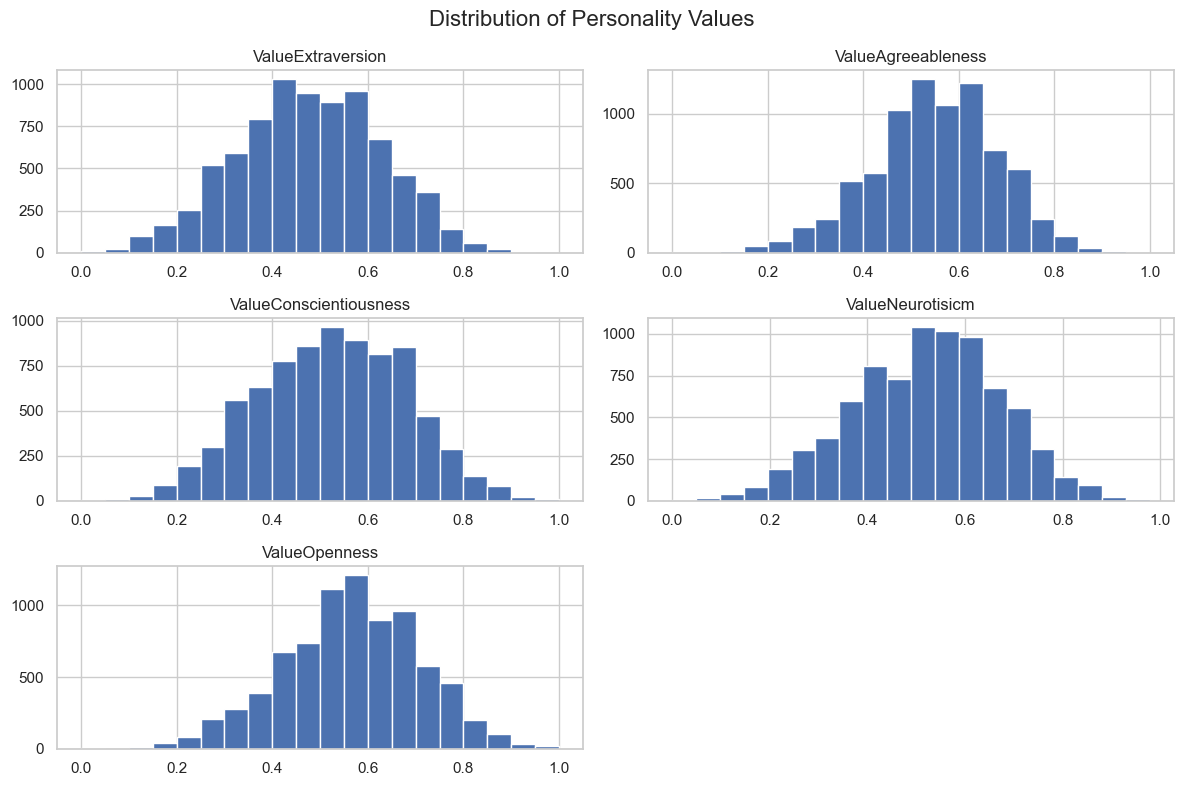

c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

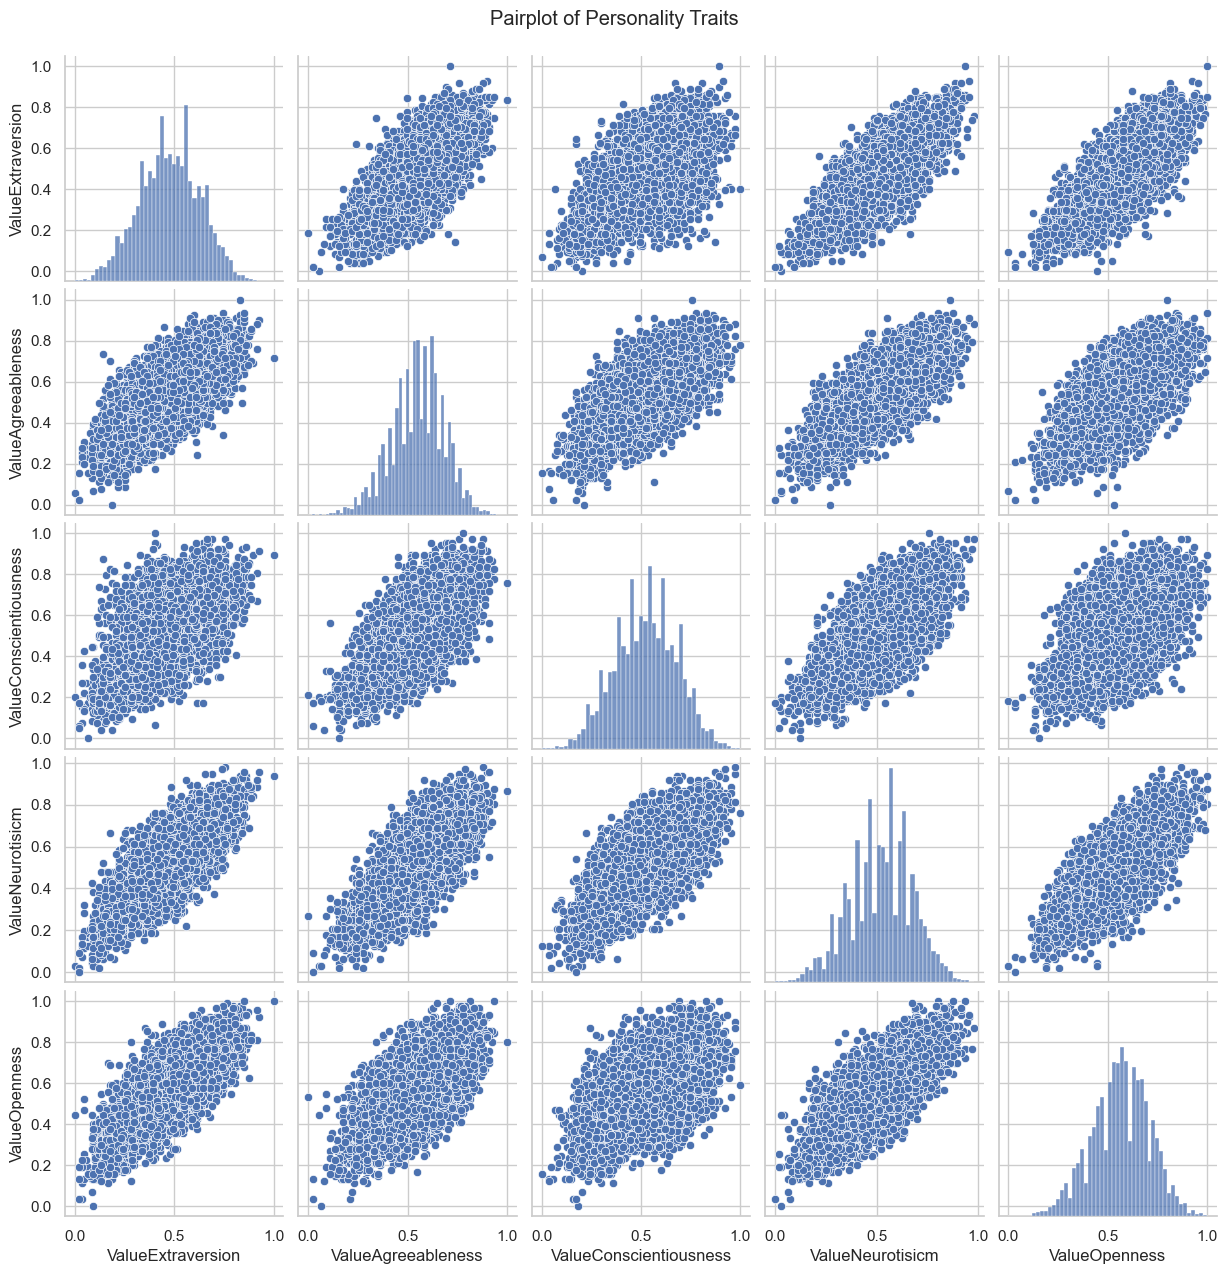

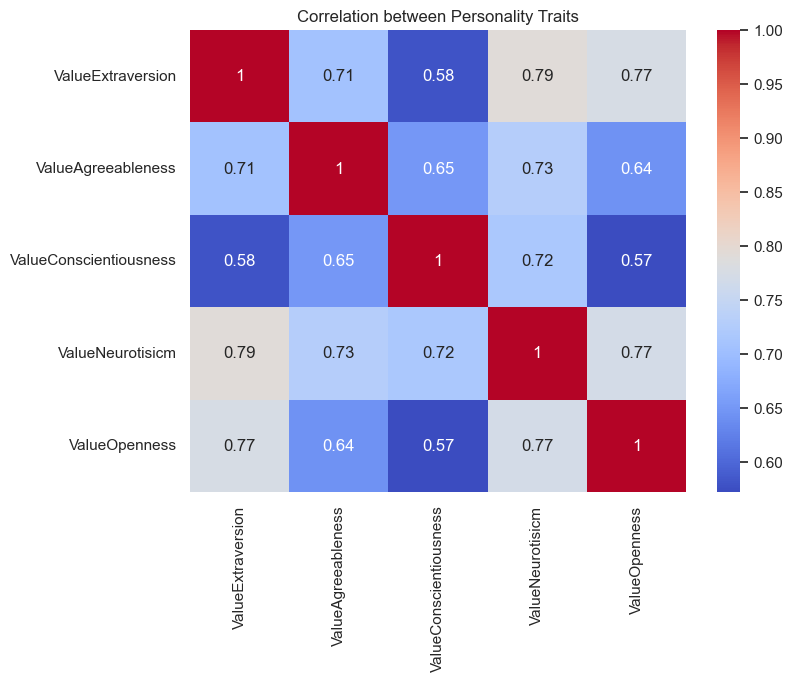

In [7]:
import seaborn as sns
# Drop 'VideoName' because it's not numeric
numeric_df = df.drop(columns=['VideoName'])

# Set the style
sns.set(style="whitegrid")

# Plot histograms for each numeric column
numeric_df.hist(figsize=(12, 8), bins=20)
plt.suptitle('Distribution of Personality Values', fontsize=16)
plt.tight_layout()
plt.show()

# Plot pairplot to see relationships between features
sns.pairplot(numeric_df)
plt.suptitle('Pairplot of Personality Traits', y=1.02)
plt.show()

# Plot a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Personality Traits')
plt.show()

In [8]:
import os
import torch
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
from torchvision import models, transforms

# === Setup ===
csv_path = "dataset/bigfive_labels.csv"
split_base = "split_dataset"  # This should contain train/, val/, test/
splits = ['train', 'val', 'test']

# Load label CSV
df = pd.read_csv(csv_path)
df["VideoID"] = df["VideoName"].str.replace(".mp4", "", regex=False)

# Image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load ResNet50 without final classification layer
resnet = models.resnet50(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
resnet.eval().cuda()

# === Feature extraction function ===
def extract_features_from_folder(folder_path):
    features = []
    for img_name in os.listdir(folder_path):
        if not img_name.lower().endswith(".jpg"):
            continue
        img_path = os.path.join(folder_path, img_name)
        image = Image.open(img_path).convert("RGB")
        image = transform(image).unsqueeze(0).cuda()
        with torch.no_grad():
            feature = resnet(image).squeeze().cpu().numpy()
        features.append(feature)
    if len(features) == 0:
        return None
    return np.mean(features, axis=0)

# === Loop over splits ===
all_data = {}

for split in splits:
    print(f"\nProcessing split: {split}")
    split_path = os.path.join(split_base, split)
    
    X_split = []
    y_split = []
    failed = []

    for folder in tqdm(os.listdir(split_path)):
        folder_path = os.path.join(split_path, folder)
        if not os.path.isdir(folder_path):
            continue

        features = extract_features_from_folder(folder_path)
        if features is None:
            failed.append(folder)
            continue

        row = df[df["VideoID"] == folder]
        if row.empty:
            failed.append(folder)
            continue

        labels = row.iloc[0, 1:6].values.astype(np.float32)  # assuming cols 1–5 are labels
        X_split.append(features)
        y_split.append(labels)

    all_data[f'X_{split}'] = np.array(X_split)
    all_data[f'y_{split}'] = np.array(y_split)

    print(f"{split.upper()} — X: {len(X_split)}, y: {len(y_split)}, Failed: {len(failed)}")

# Example: Access your splits
X_train = all_data['X_train']
y_train = all_data['y_train']
X_val   = all_data['X_val']
y_val   = all_data['y_val']
X_test  = all_data['X_test']
y_test  = all_data['y_test']

os.makedirs("extracted_features", exist_ok=True)
# Save arrays to extracted_features/ folder
for key, array in all_data.items():
    save_path = os.path.join("extracted_features", f"{key}.npy")
    np.save(save_path, array)
    print(f"Saved {key} to {save_path}")



c:\Users\muham\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\muham\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Processing split: train


100%|██████████| 4798/4798 [02:10<00:00, 36.76it/s]


TRAIN — X: 4798, y: 4798, Failed: 0

Processing split: val


100%|██████████| 1599/1599 [00:42<00:00, 37.27it/s]


VAL — X: 1599, y: 1599, Failed: 0

Processing split: test


100%|██████████| 1600/1600 [00:42<00:00, 37.52it/s]


TEST — X: 1600, y: 1600, Failed: 0
Saved X_train to extracted_features\X_train.npy
Saved y_train to extracted_features\y_train.npy
Saved X_val to extracted_features\X_val.npy
Saved y_val to extracted_features\y_val.npy
Saved X_test to extracted_features\X_test.npy
Saved y_test to extracted_features\y_test.npy


In [10]:
import numpy as np
# Load features and labels
X = np.load("extracted_features/X_train.npy")
y = np.load("extracted_features/y_train.npy")

In [11]:
import random

# Pick 5 random indices
sample_indices = random.sample(range(len(X)), 5)

# Print samples
for idx in sample_indices:
    print(f"Sample {idx}:")
    print(f"Feature (X): {X[idx]}")
    print(f"Label (y): {y[idx]}")
    print("-" * 50)


Sample 3030:
Feature (X): [0.30523363 3.3079376  0.20628738 ... 0.13450606 0.1404612  0.08757516]
Label (y): [0.48598132 0.74725276 0.79611653 0.7291667  0.73333335]
--------------------------------------------------
Sample 4533:
Feature (X): [0.9497455  1.6860282  0.6423539  ... 0.22485915 0.50756335 0.44691837]
Label (y): [0.42056075 0.5494506  0.5436893  0.59375    0.5888889 ]
--------------------------------------------------
Sample 1351:
Feature (X): [0.1366526  1.1929932  0.34115988 ... 0.08242436 0.25146046 0.03727179]
Label (y): [0.41121495 0.51648355 0.49514562 0.5416667  0.5       ]
--------------------------------------------------
Sample 3593:
Feature (X): [0.18778372 1.5291218  0.30694628 ... 0.3583734  0.3731863  0.31568724]
Label (y): [0.41121495 0.51648355 0.3883495  0.5104167  0.5       ]
--------------------------------------------------
Sample 1995:
Feature (X): [0.11424717 0.70674396 1.0614944  ... 0.24188042 0.45597318 0.25592345]
Label (y): [0.42990655 0.53846157 

In [12]:
X.shape, y.shape

((4798, 2048), (4798, 5))

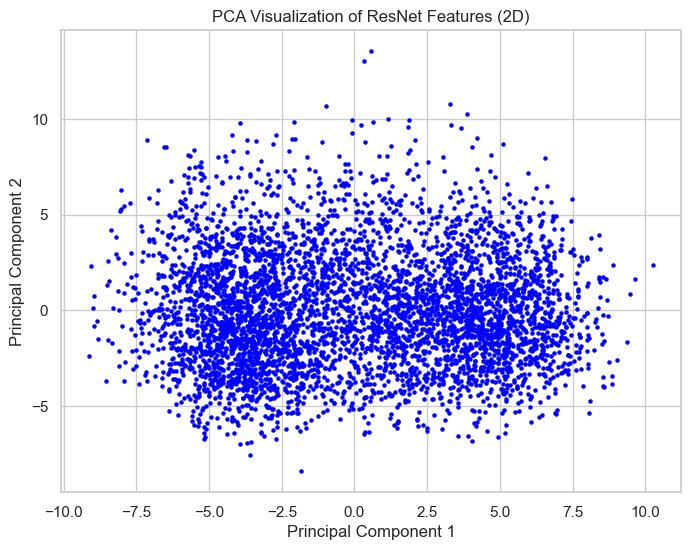

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 components just for visualization
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c='blue', s=5)  # you can also color by y if classification
plt.title('PCA Visualization of ResNet Features (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [13]:
import numpy as np
from sklearn.decomposition import PCA
import os

# === Load saved features ===
base_path = "extracted_features"
X_train = np.load(os.path.join(base_path, "X_train.npy"))
y_train = np.load(os.path.join(base_path, "y_train.npy"))
X_val   = np.load(os.path.join(base_path, "X_val.npy"))
y_val   = np.load(os.path.join(base_path, "y_val.npy"))
X_test  = np.load(os.path.join(base_path, "X_test.npy"))
y_test  = np.load(os.path.join(base_path, "y_test.npy"))

# === Apply PCA ===
pca = PCA(n_components=300)
X_train_pca = pca.fit_transform(X_train)
X_val_pca   = pca.transform(X_val)
X_test_pca  = pca.transform(X_test)

In [14]:
# X.shape, y.shape

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    explained_variance_score, max_error, median_absolute_error
)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings("ignore")


In [16]:
import time
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

models = {}

# === Random Forest Tuning ===
print("🔍 Tuning Random Forest...")
start = time.time()
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}
rf_search = RandomizedSearchCV(rf_base, rf_params, n_iter=5, cv=2, scoring='neg_mean_squared_error',
                               random_state=42, n_jobs=-1, verbose=1)
rf_search.fit(X_train_pca, y_train)
models["RandomForest"] = rf_search.best_estimator_
print(f"✅ Random Forest tuning done in {time.time() - start:.2f} seconds.\n")

# === ExtraTrees Tuning (instead of Gradient Boosting) ===
print("⚡ Tuning ExtraTrees (replacing Gradient Boosting)...")
start = time.time()
et_base = ExtraTreesRegressor(random_state=42, n_jobs=-1)
et_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None]
}
et_search = RandomizedSearchCV(et_base, et_params, n_iter=5, cv=2, scoring='neg_mean_squared_error',
                               random_state=42, n_jobs=-1, verbose=1)
et_search.fit(X_train_pca, y_train)
models["ExtraTrees"] = et_search.best_estimator_
print(f"✅ ExtraTrees tuning done in {time.time() - start:.2f} seconds.\n")

# === Ridge Tuning ===
print("🔍 Tuning Ridge Regression...")
start = time.time()
ridge_base = Ridge()
ridge_params = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}
ridge_search = RandomizedSearchCV(ridge_base, ridge_params, n_iter=4, cv=2, scoring='neg_mean_squared_error',
                                  random_state=42, n_jobs=-1, verbose=1)
ridge_search.fit(X_train_pca, y_train)
models["Ridge"] = ridge_search.best_estimator_
print(f"✅ Ridge tuning done in {time.time() - start:.2f} seconds.\n")

# === SVR Tuning ===
print("🔍 Tuning SVR (1 trait only)...")
start = time.time()
svr_base = SVR()
svr_params = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf', 'linear']
}
svr_search = RandomizedSearchCV(svr_base, svr_params, n_iter=5, cv=2, scoring='neg_mean_squared_error',
                                random_state=42, n_jobs=-1, verbose=1)
svr_search.fit(X_train_pca, y_train[:, 0])
best_svr = svr_search.best_estimator_
models["SVR"] = MultiOutputRegressor(best_svr)
print(f"✅ SVR tuning done in {time.time() - start:.2f} seconds.\n")

# === XGBoost Tuning (GPU) ===
print("🔍 Tuning XGBoost (GPU)...")
start = time.time()
xgb_base = XGBRegressor(random_state=42, tree_method="gpu_hist", enable_categorical=False)
xgb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}
xgb_search = RandomizedSearchCV(xgb_base, xgb_params, n_iter=5, cv=2, scoring='neg_mean_squared_error',
                                random_state=42, n_jobs=-1, verbose=1)
xgb_search.fit(X_train_pca, y_train)
models["XGBoost"] = MultiOutputRegressor(xgb_search.best_estimator_)
print(f"✅ XGBoost tuning done in {time.time() - start:.2f} seconds.\n")


🔍 Tuning Random Forest...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Random Forest tuning done in 136.03 seconds.

⚡ Tuning ExtraTrees (replacing Gradient Boosting)...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ ExtraTrees tuning done in 40.41 seconds.

🔍 Tuning Ridge Regression...
Fitting 2 folds for each of 4 candidates, totalling 8 fits
✅ Ridge tuning done in 0.16 seconds.

🔍 Tuning SVR (1 trait only)...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ SVR tuning done in 5.59 seconds.

🔍 Tuning XGBoost (GPU)...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ XGBoost tuning done in 41.40 seconds.



In [17]:
def evaluate_model(name, model, X_data, y_data, label):
    preds = model.predict(X_data)
    rmse = np.sqrt(mean_squared_error(y_data, preds, multioutput='raw_values'))
    mae = mean_absolute_error(y_data, preds)
    r2 = r2_score(y_data, preds, multioutput='raw_values')
    expl_var = explained_variance_score(y_data, preds, multioutput='raw_values')
    max_err = [max_error(y_data[:, i], preds[:, i]) for i in range(y_data.shape[1])]
    med_ae = [median_absolute_error(y_data[:, i], preds[:, i]) for i in range(y_data.shape[1])]

    metrics_dict = {
        "RMSE": rmse,
        "MAE": [mae] * len(rmse),
        "R²": r2,
        "Explained Variance": expl_var,
        "Max Error": max_err,
        "Median AE": med_ae,
    }

    metrics_df = pd.DataFrame(metrics_dict, index=[f"Trait {i+1}" for i in range(len(rmse))])
    averages = {k: np.mean(v) if isinstance(v, (list, np.ndarray)) else v for k, v in metrics_dict.items()}
    metrics_df.loc["Average"] = averages

    print(f"\n📊 {name} - {label} Evaluation")
    print(metrics_df)

    plt.figure(figsize=(12, 6))
    sns.heatmap(metrics_df.iloc[:-1].astype(float), annot=True, fmt=".3f", cmap="coolwarm")
    plt.title(f"{label} Metrics for {name}")
    plt.show()

    # Return average metrics as a Series with model name
    return pd.Series(averages, name=name)



🚀 Training RandomForest

📊 RandomForest - Validation Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.138840  0.109117  0.202233            0.202627   0.489929   
Trait 2  0.128905  0.109117  0.147241            0.147669   0.515489   
Trait 3  0.135495  0.109117  0.241120            0.241539   0.474393   
Trait 4  0.141661  0.109117  0.182278            0.183116   0.452580   
Trait 5  0.137182  0.109117  0.178961            0.179573   0.510861   
Average  0.136417  0.109117  0.190367            0.190905   0.488650   

         Median AE  
Trait 1   0.093920  
Trait 2   0.087381  
Trait 3   0.095176  
Trait 4   0.097745  
Trait 5   0.089074  
Average   0.092659  


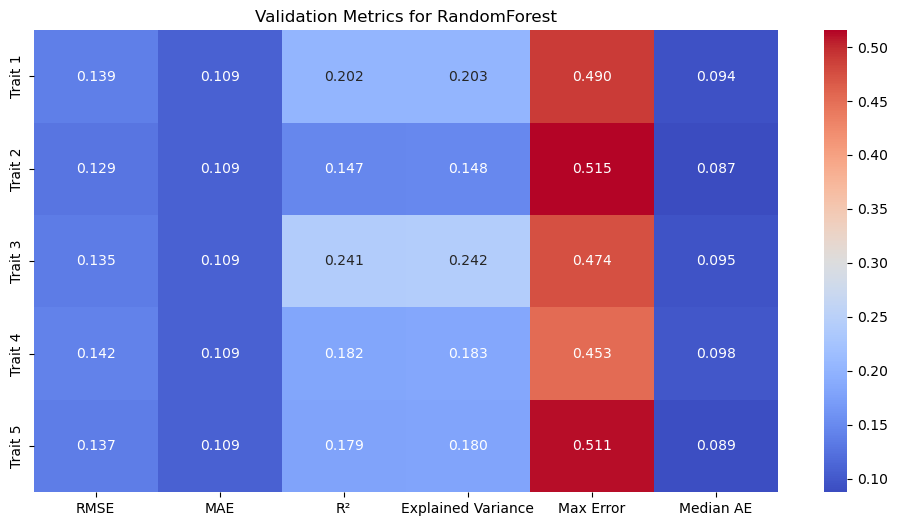


📊 RandomForest - Test Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.132549  0.105893  0.213485            0.213742   0.396431   
Trait 2  0.121705  0.105893  0.145982            0.146088   0.388026   
Trait 3  0.137212  0.105893  0.244528            0.245899   0.423583   
Trait 4  0.135804  0.105893  0.185582            0.185592   0.459119   
Trait 5  0.132596  0.105893  0.175856            0.178795   0.452841   
Average  0.131973  0.105893  0.193087            0.194023   0.424000   

         Median AE  
Trait 1   0.094580  
Trait 2   0.082866  
Trait 3   0.094891  
Trait 4   0.091692  
Trait 5   0.089391  
Average   0.090684  


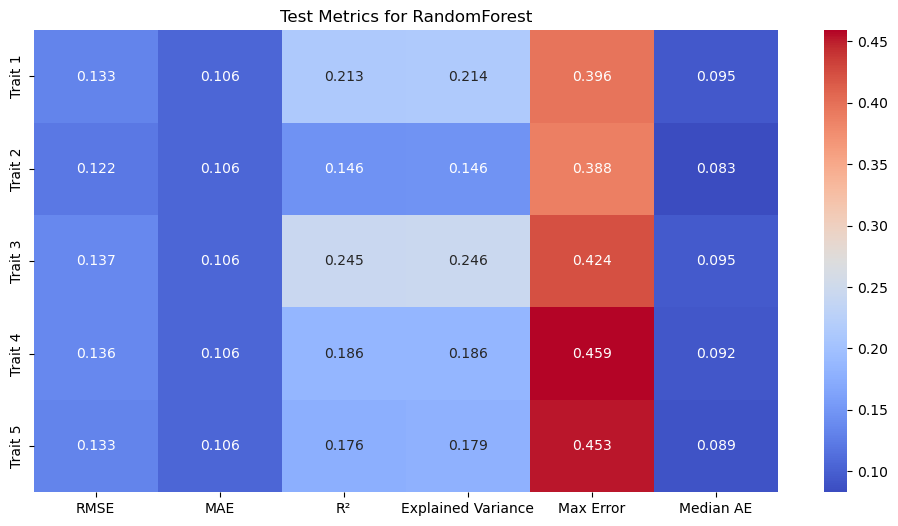


🚀 Training ExtraTrees

📊 ExtraTrees - Validation Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.132749  0.104081  0.270700            0.270809   0.488723   
Trait 2  0.124443  0.104081  0.205249            0.205319   0.514506   
Trait 3  0.127563  0.104081  0.327365            0.327691   0.465502   
Trait 4  0.135952  0.104081  0.246861            0.247127   0.451528   
Trait 5  0.131782  0.104081  0.242331            0.242420   0.464074   
Average  0.130498  0.104081  0.258501            0.258673   0.476866   

         Median AE  
Trait 1   0.088287  
Trait 2   0.085128  
Trait 3   0.088673  
Trait 4   0.092083  
Trait 5   0.084222  
Average   0.087679  


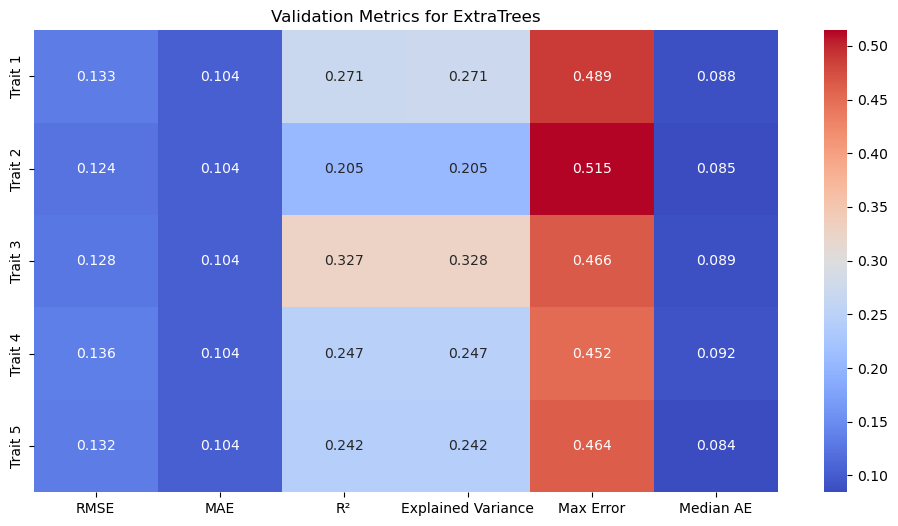


📊 ExtraTrees - Test Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.126738  0.101173  0.280930            0.281044   0.378318   
Trait 2  0.118093  0.101173  0.195920            0.195971   0.399048   
Trait 3  0.130571  0.101173  0.315892            0.317179   0.437282   
Trait 4  0.130390  0.101173  0.249225            0.249334   0.462083   
Trait 5  0.127620  0.101173  0.236556            0.237961   0.422667   
Average  0.126682  0.101173  0.255705            0.256298   0.419879   

         Median AE  
Trait 1   0.088380  
Trait 2   0.077839  
Trait 3   0.088835  
Trait 4   0.087708  
Trait 5   0.084815  
Average   0.085515  


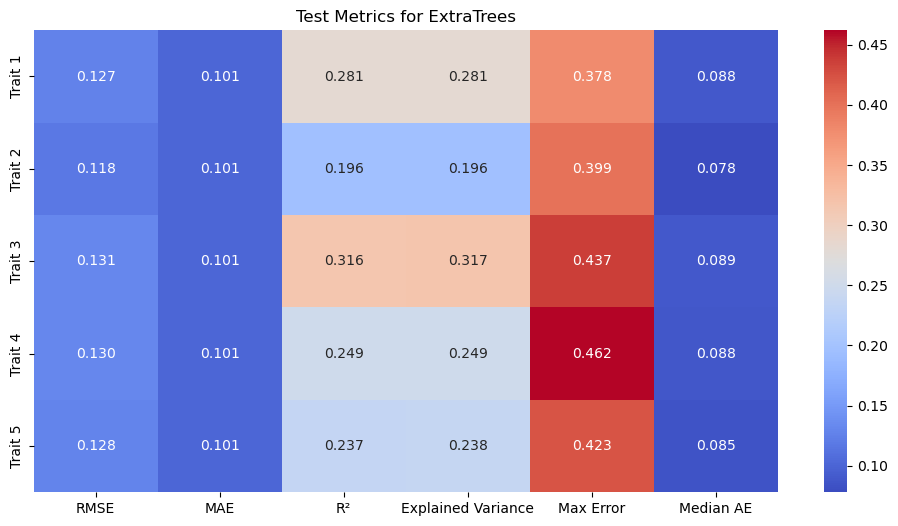


🚀 Training Ridge

📊 Ridge - Validation Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.135071  0.105502  0.244966            0.244968   0.453939   
Trait 2  0.129231  0.105502  0.142919            0.143060   0.548317   
Trait 3  0.125596  0.105502  0.347951            0.348091   0.454231   
Trait 4  0.139019  0.105502  0.212496            0.212886   0.411022   
Trait 5  0.131061  0.105502  0.250603            0.250778   0.440111   
Average  0.131996  0.105502  0.239787            0.239957   0.461524   

         Median AE  
Trait 1   0.087536  
Trait 2   0.086858  
Trait 3   0.082203  
Trait 4   0.096817  
Trait 5   0.092543  
Average   0.089191  


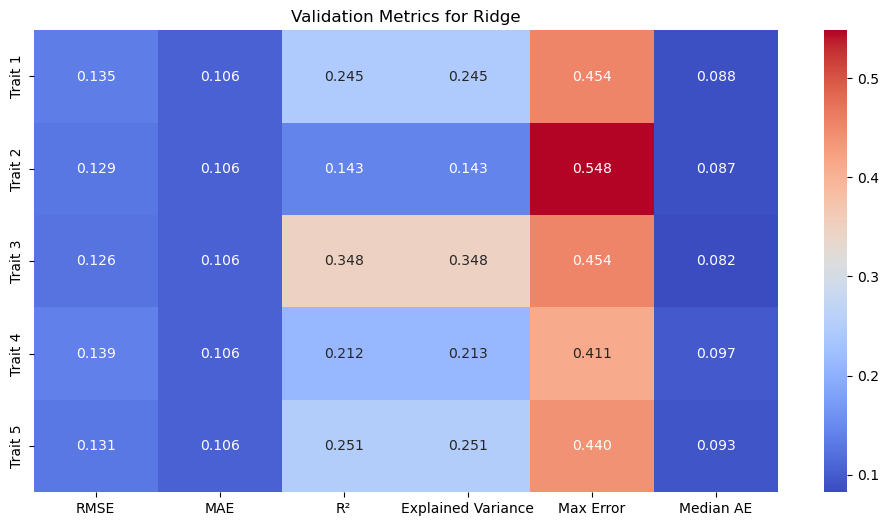


📊 Ridge - Test Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.135169  0.105726  0.182081            0.182096   0.466043   
Trait 2  0.124049  0.105726  0.112768            0.112802   0.409659   
Trait 3  0.131387  0.105726  0.307315            0.307829   0.396397   
Trait 4  0.137420  0.105726  0.166085            0.166170   0.450885   
Trait 5  0.132198  0.105726  0.180802            0.183118   0.550550   
Average  0.132044  0.105726  0.189810            0.190403   0.454707   

         Median AE  
Trait 1   0.093221  
Trait 2   0.082203  
Trait 3   0.090608  
Trait 4   0.093883  
Trait 5   0.091510  
Average   0.090285  


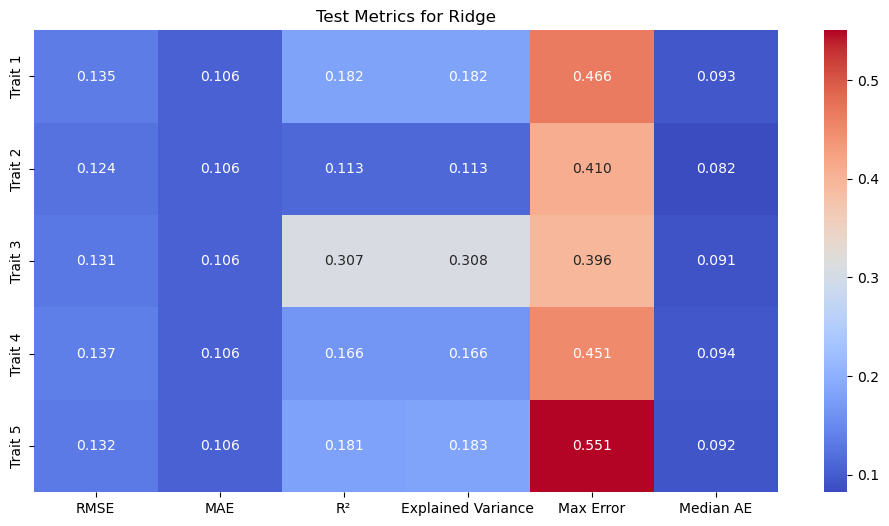


🚀 Training SVR

📊 SVR - Validation Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.126998  0.099112  0.332524            0.332694   0.438260   
Trait 2  0.122439  0.099112  0.230650            0.232908   0.495264   
Trait 3  0.118709  0.099112  0.417497            0.418220   0.392747   
Trait 4  0.130441  0.099112  0.306687            0.307775   0.447437   
Trait 5  0.123504  0.099112  0.334526            0.335171   0.424555   
Average  0.124418  0.099112  0.324377            0.325354   0.439653   

         Median AE  
Trait 1   0.082594  
Trait 2   0.081649  
Trait 3   0.078626  
Trait 4   0.087295  
Trait 5   0.084101  
Average   0.082853  


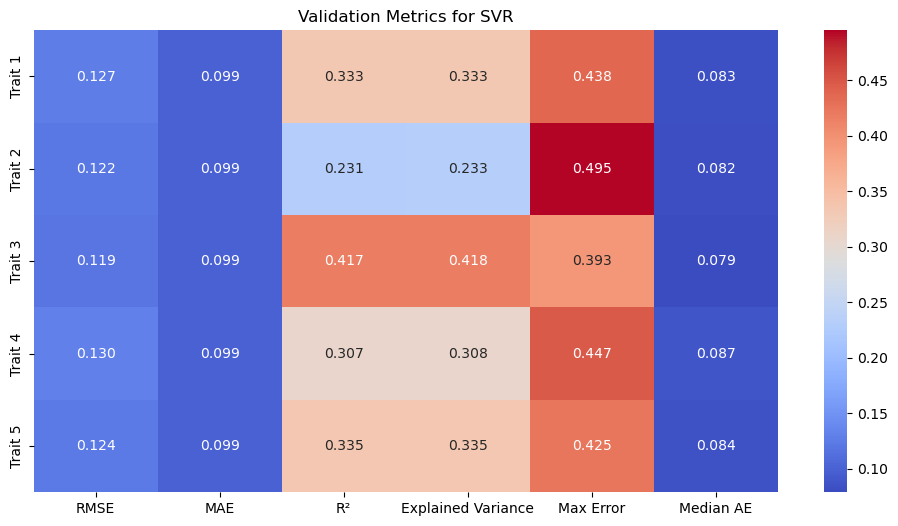


📊 SVR - Test Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.124450  0.098778  0.306662            0.306889   0.386104   
Trait 2  0.117102  0.098778  0.209355            0.211887   0.382279   
Trait 3  0.121904  0.098778  0.403694            0.405896   0.405153   
Trait 4  0.128825  0.098778  0.267140            0.267484   0.415390   
Trait 5  0.124884  0.098778  0.268941            0.272540   0.453493   
Average  0.123433  0.098778  0.291158            0.292939   0.408484   

         Median AE  
Trait 1   0.086107  
Trait 2   0.078446  
Trait 3   0.080905  
Trait 4   0.088099  
Trait 5   0.085884  
Average   0.083888  


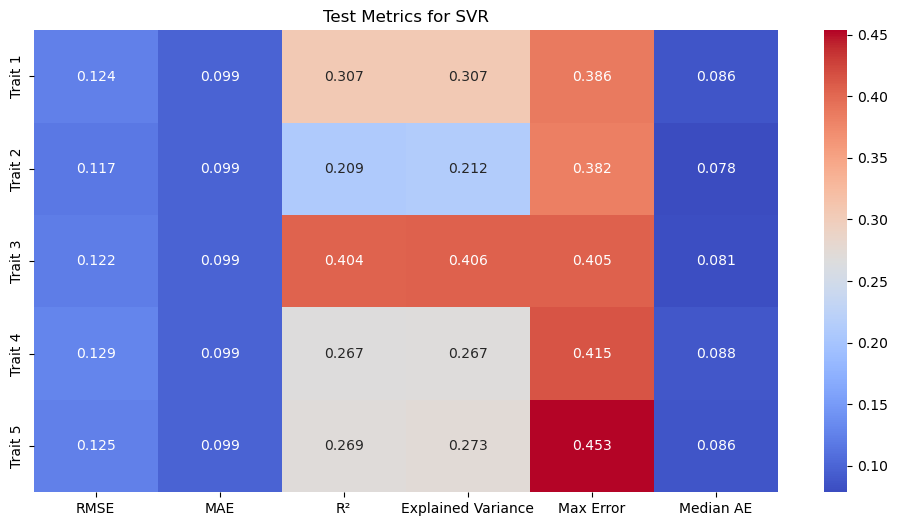


🚀 Training XGBoost

📊 XGBoost - Validation Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.136728  0.106787  0.226324            0.226661   0.479805   
Trait 2  0.128269  0.106787  0.155636            0.155979   0.467378   
Trait 3  0.129287  0.106787  0.309059            0.309508   0.481545   
Trait 4  0.138613  0.106787  0.217093            0.217698   0.431698   
Trait 5  0.133883  0.106787  0.217981            0.218640   0.464151   
Average  0.133356  0.106787  0.225219            0.225697   0.464915   

         Median AE  
Trait 1   0.093506  
Trait 2   0.086928  
Trait 3   0.089517  
Trait 4   0.095623  
Trait 5   0.086475  
Average   0.090410  


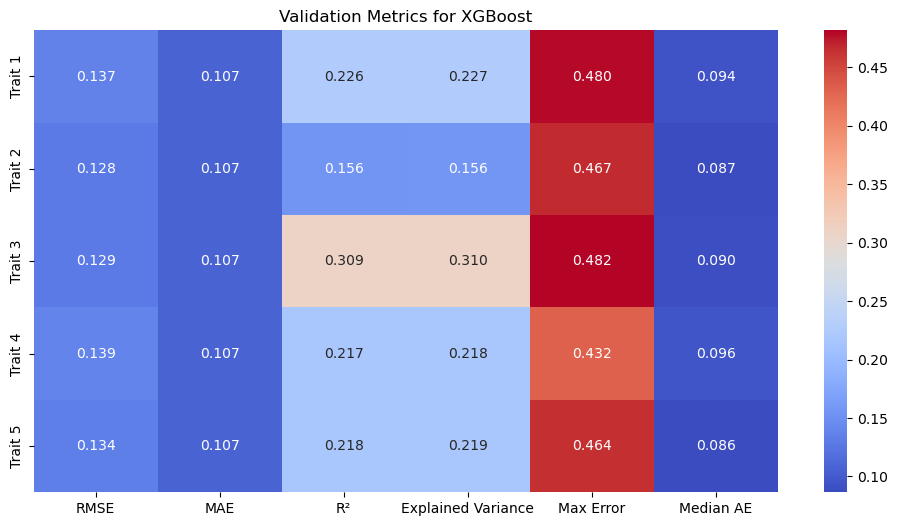


📊 XGBoost - Test Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.132436  0.104722  0.214826            0.215032   0.414152   
Trait 2  0.122329  0.104722  0.137202            0.137314   0.389692   
Trait 3  0.131929  0.104722  0.301581            0.302643   0.477466   
Trait 4  0.135347  0.104722  0.191057            0.191064   0.434226   
Trait 5  0.130871  0.104722  0.197159            0.200036   0.458065   
Average  0.130582  0.104722  0.208365            0.209218   0.434720   

         Median AE  
Trait 1   0.092275  
Trait 2   0.081494  
Trait 3   0.090573  
Trait 4   0.091601  
Trait 5   0.091806  
Average   0.089550  


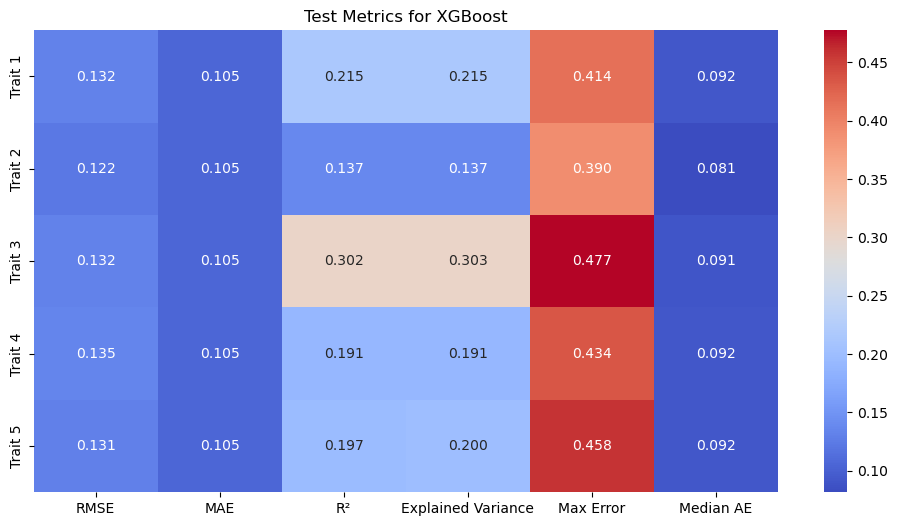

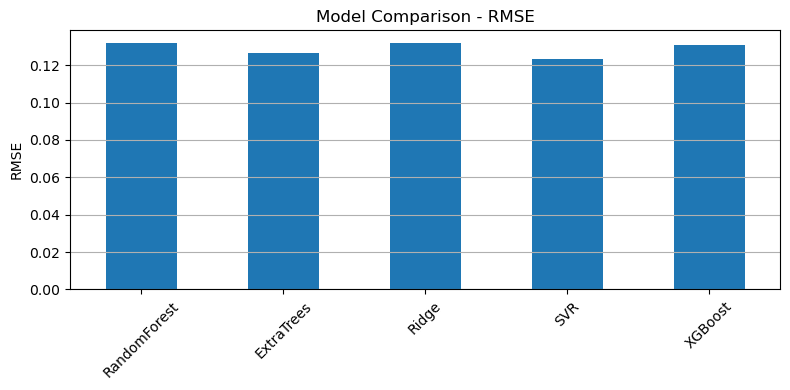

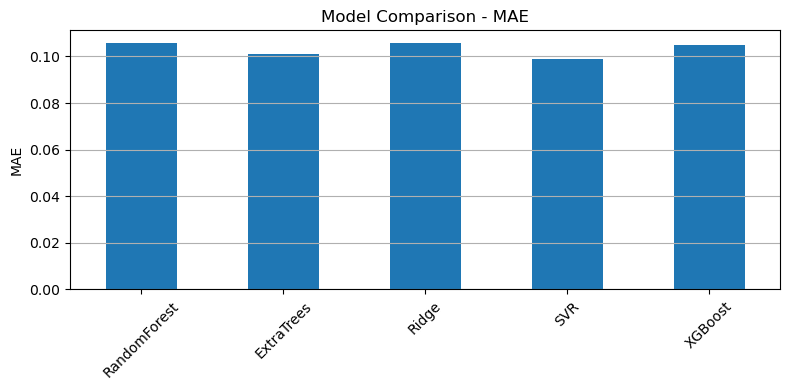

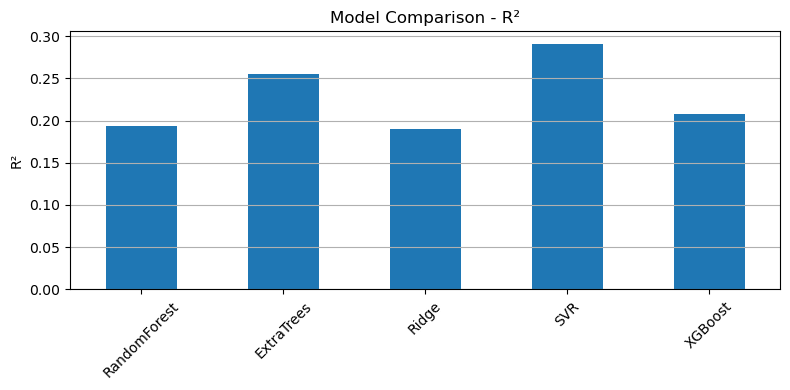

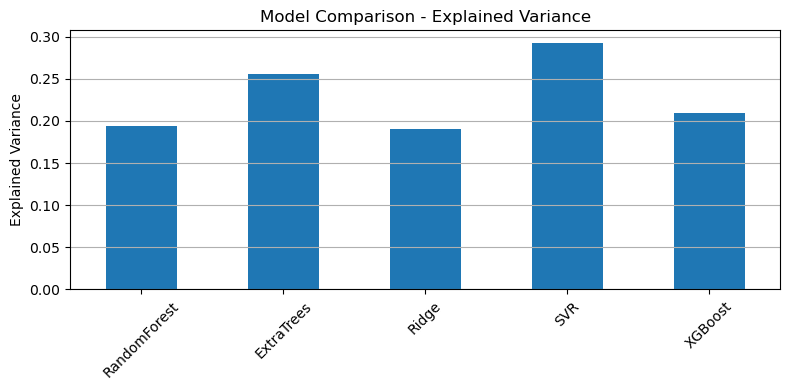

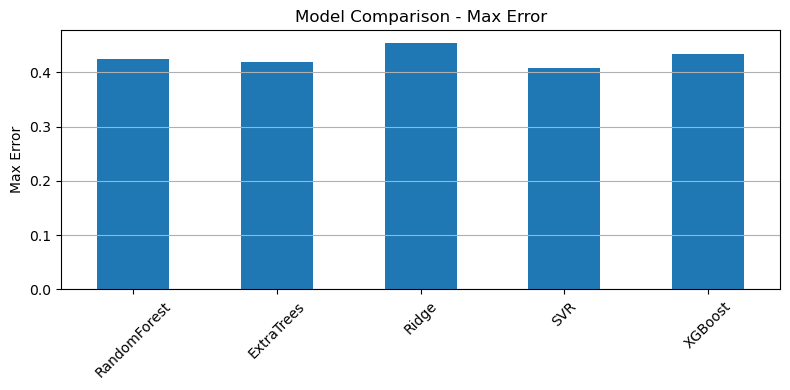

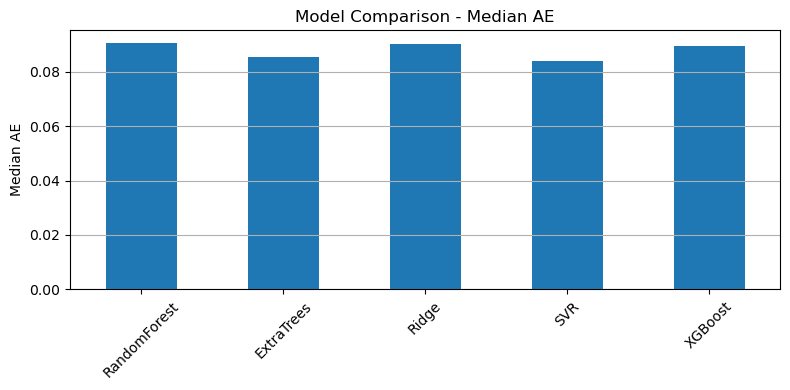

In [18]:
test_results = {}  # To store averaged metric Series per model
for name, model in models.items():
    print(f"\n🚀 Training {name}")
    model.fit(X_train_pca, y_train)
    evaluate_model(name, model, X_val_pca, y_val, "Validation")

    # Save only test evaluation (average row) for comparison plots
    avg_metrics = evaluate_model(name, model, X_test_pca, y_test, "Test")
    test_results[name] = avg_metrics

# Combine all model averages into a comparison DataFrame
comparison_df = pd.DataFrame(test_results).T  # Models as rows, metrics as columns

# Plot one comparative bar chart per metric
for metric in comparison_df.columns:
    plt.figure(figsize=(8, 4))
    comparison_df[metric].plot(kind='bar', title=f'Model Comparison - {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

In [19]:
oof_train_preds = []
val_preds = []
test_preds = []

for name, model in models.items():
    print(f"Training {name}")
    model.fit(X_train_pca, y_train)

    train_pred = model.predict(X_train_pca)
    val_pred = model.predict(X_val_pca)
    test_pred = model.predict(X_test_pca)

    oof_train_preds.append(train_pred)
    val_preds.append(val_pred)
    test_preds.append(test_pred)

stacked_train = np.hstack(oof_train_preds)
stacked_val = np.hstack(val_preds)
stacked_test = np.hstack(test_preds)

print("Stacked train shape:", stacked_train.shape)
print("Stacked val shape:", stacked_val.shape)
print("Stacked test shape:", stacked_test.shape)


Training RandomForest
Training ExtraTrees
Training Ridge
Training SVR
Training XGBoost
Stacked train shape: (4798, 25)
Stacked val shape: (1599, 25)
Stacked test shape: (1600, 25)


In [20]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

print("🔁 Tuning MultiOutput(HistGradientBoostingRegressor) as Meta-Learner...")
start = time.time()

base_model = HistGradientBoostingRegressor(random_state=42)
meta_base = MultiOutputRegressor(base_model)

meta_params = {
    'estimator__max_iter': [100, 200, 300],
    'estimator__max_depth': [3, 5, 7],
    'estimator__learning_rate': [0.01, 0.05, 0.1]
}

meta_search = GridSearchCV(meta_base, meta_params, cv=3, scoring='neg_mean_squared_error',
                           verbose=1, n_jobs=-1)
meta_search.fit(stacked_train, y_train)

# === TUNING HISTORY === Meta-Learner: MultiOutput(HistGBR) Grid Search
meta_model = meta_search.best_estimator_
print(f"✅ Meta-learner tuning done in {time.time() - start:.2f} seconds.\n")

val_meta_preds = meta_model.predict(stacked_val)
test_meta_preds = meta_model.predict(stacked_test)


🔁 Tuning MultiOutput(HistGradientBoostingRegressor) as Meta-Learner...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
✅ Meta-learner tuning done in 25.28 seconds.




=== Deep Super Learner Meta-Model Metrics (Validation) ===
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.132665  0.104074  0.271627            0.271746   0.485965   
Trait 2  0.124466  0.104074  0.204966            0.205042   0.516490   
Trait 3  0.127636  0.104074  0.326602            0.326916   0.466026   
Trait 4  0.136107  0.104074  0.245141            0.245413   0.447906   
Trait 5  0.131907  0.104074  0.240892            0.240988   0.466709   
Average  0.130556  0.104074  0.257846            0.258021   0.476619   

         Median AE  
Trait 1   0.084144  
Trait 2   0.087908  
Trait 3   0.087382  
Trait 4   0.093749  
Trait 5   0.088868  
Average   0.088410  


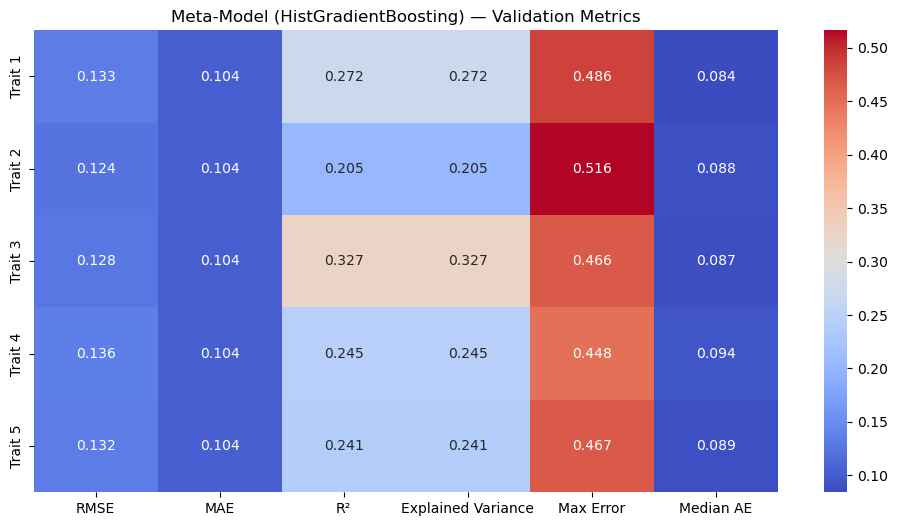


=== Deep Super Learner Meta-Model Metrics (Test) ===
             RMSE      MAE        R²  Explained Variance  Max Error  Median AE
Trait 1  0.126810  0.10113  0.280115            0.280239   0.373829   0.084141
Trait 2  0.118147  0.10113  0.195179            0.195236   0.395619   0.076924
Trait 3  0.130605  0.10113  0.315529            0.316788   0.436908   0.087385
Trait 4  0.130393  0.10113  0.249191            0.249308   0.458335   0.083354
Trait 5  0.127582  0.10113  0.237013            0.238463   0.422229   0.088867
Average  0.126707  0.10113  0.255405            0.256007   0.417384   0.084134


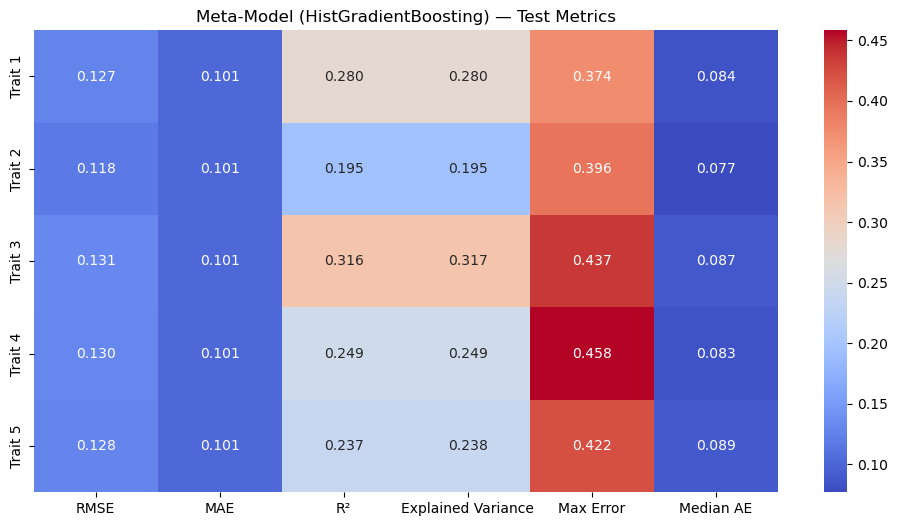

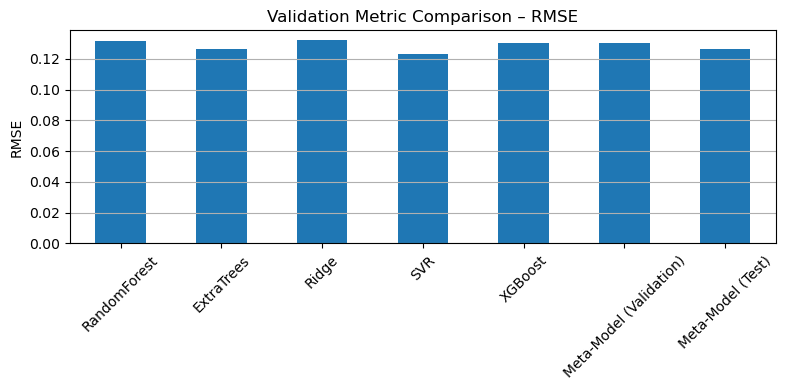

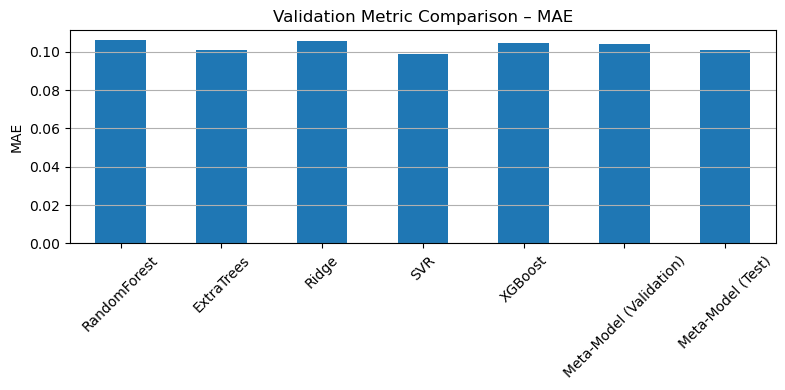

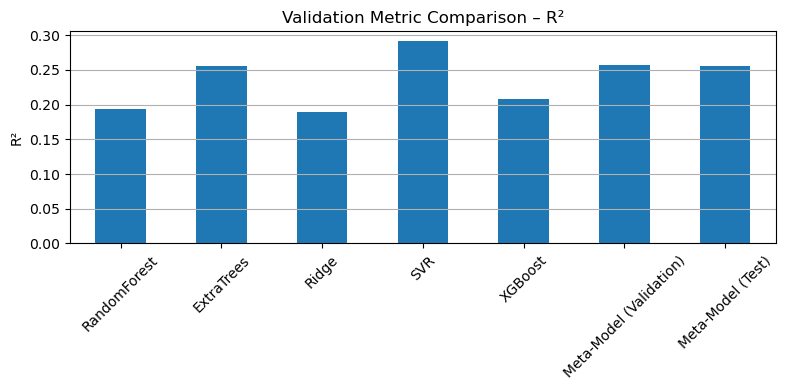

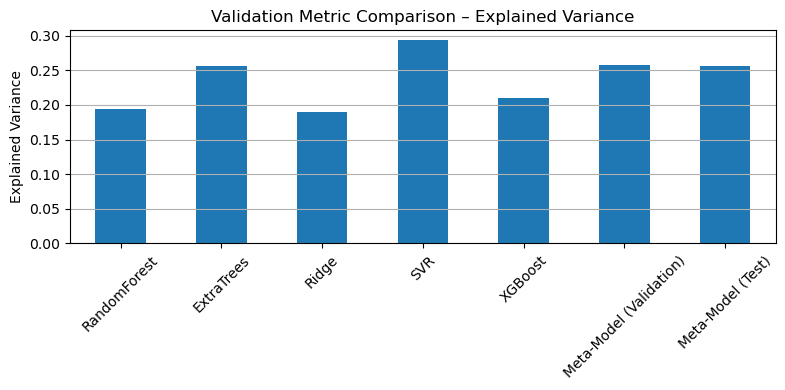

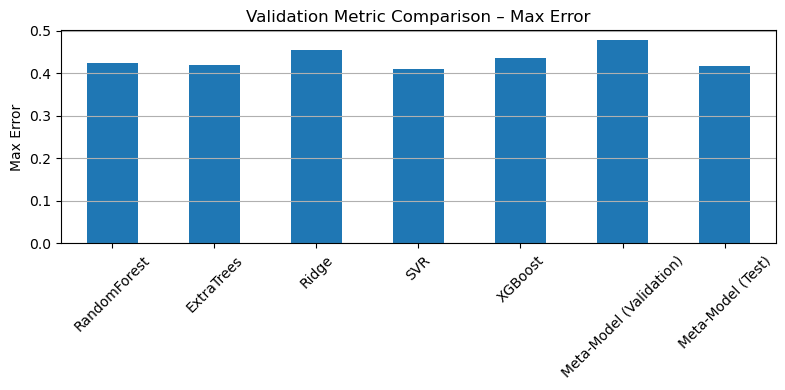

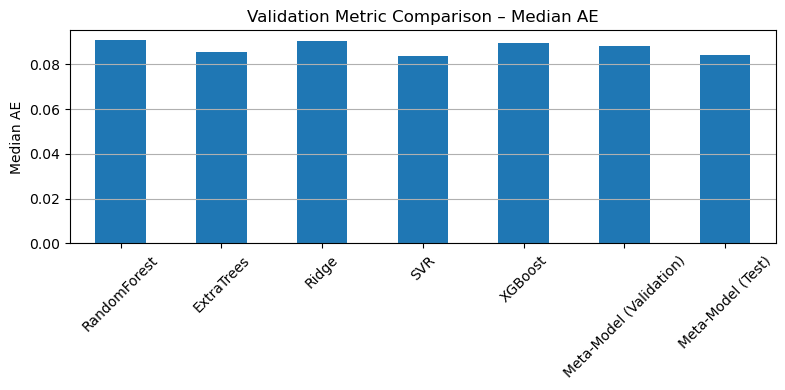

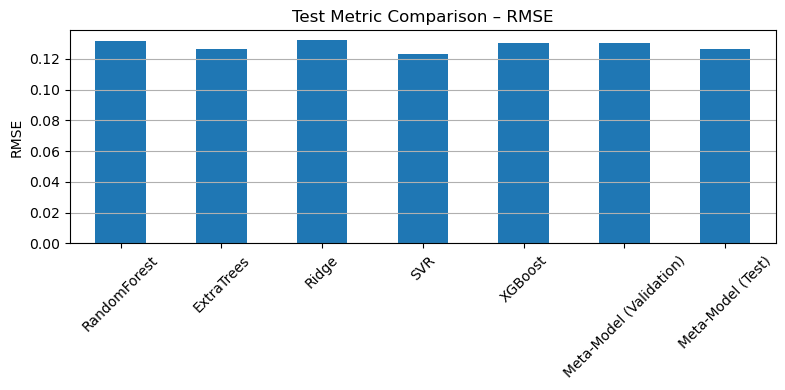

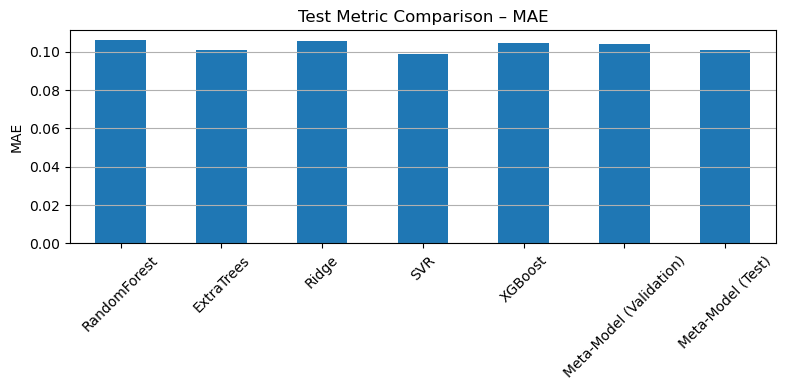

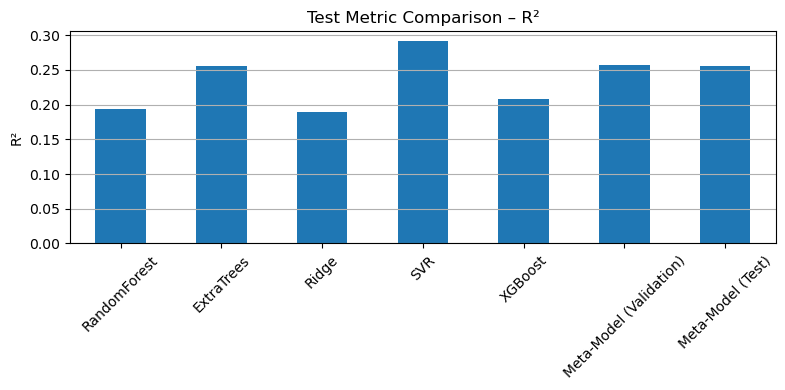

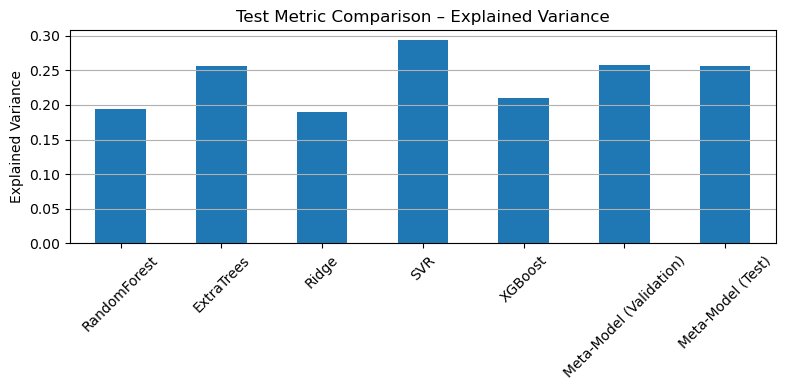

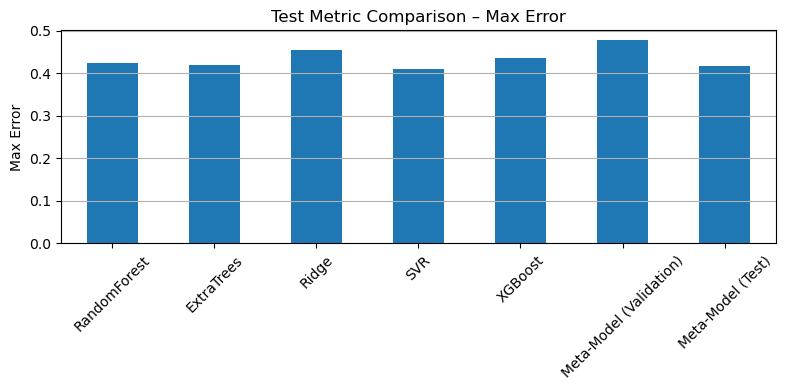

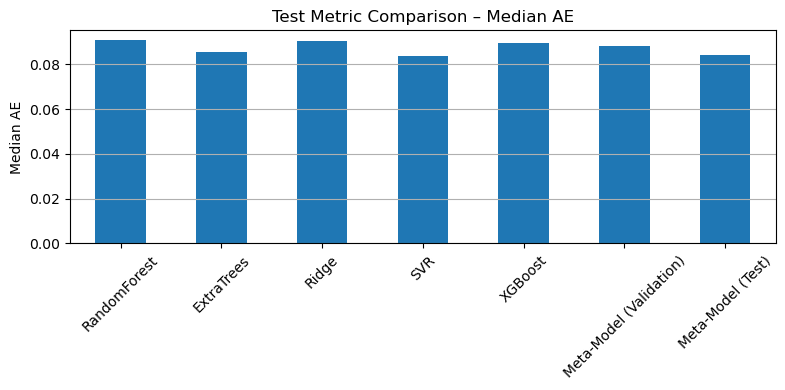

In [21]:
# Function to evaluate predictions and return average metrics
def evaluate_predictions(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred, multioutput='raw_values'))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred, multioutput='raw_values')
    expl_var = explained_variance_score(y_true, y_pred, multioutput='raw_values')
    max_err = [max_error(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])]
    med_ae = [median_absolute_error(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])]

    metrics_dict = {
        "RMSE": rmse,
        "MAE": [mae] * len(rmse),
        "R²": r2,
        "Explained Variance": expl_var,
        "Max Error": max_err,
        "Median AE": med_ae,
    }

    metrics_df = pd.DataFrame(metrics_dict, index=[f"Trait {i+1}" for i in range(len(rmse))])
    averages = {k: np.mean(v) if isinstance(v, (list, np.ndarray)) else v for k, v in metrics_dict.items()}
    metrics_df.loc["Average"] = averages

    print(f"\n=== Deep Super Learner Meta-Model Metrics ({label}) ===")
    print(metrics_df)

    # Plot heatmap for visualization
    plt.figure(figsize=(12, 6))
    sns.heatmap(metrics_df.iloc[:-1].astype(float), annot=True, fmt=".3f", cmap="coolwarm")
    plt.title(f"Meta-Model (HistGradientBoosting) — {label} Metrics")
    plt.show()

    return pd.Series(averages, name=f"Meta-Model ({label})")

# Assuming val_meta_preds and test_meta_preds are already defined, as well as y_val, y_test
# Evaluate and store results for validation and test sets
meta_val_avg_metrics = evaluate_predictions(y_val, val_meta_preds, "Validation")
meta_test_avg_metrics = evaluate_predictions(y_test, test_meta_preds, "Test")

# Initialize comparison DataFrames if not done already
# Assuming test_results has been filled with base models' average metrics
comparison_df = pd.DataFrame(test_results).T  # base models results

# Store meta-learner results in comparison_df
comparison_df.loc["Meta-Model (Validation)"] = meta_val_avg_metrics
comparison_df.loc["Meta-Model (Test)"] = meta_test_avg_metrics

# Plotting model comparison for validation metrics
for metric in comparison_df.columns:
    plt.figure(figsize=(8, 4))
    comparison_df[metric].plot(kind='bar')
    plt.title(f'Validation Metric Comparison – {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

# Plotting model comparison for test metrics
for metric in comparison_df.columns:
    plt.figure(figsize=(8, 4))
    comparison_df[metric].plot(kind='bar')
    plt.title(f'Test Metric Comparison – {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()